# Thera Bank Personal Loan Campaign

## Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
Banking

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
1. ID: Customer ID
2. Age: Customer's age in completed years
3. Experience: #years of professional experience
4. Income: Annual income of the customer
5. ZIP Code: Home Address ZIP code.
6. Family: Family size of the customer
7. CCAvg: Avg. spending on credit cards per month 
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  - Cat
9. Mortgage: Value of house mortgage if any.
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign? - Cat
11. Securities Account: Does the customer have a securities account with the bank? - Cat
12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank? - Cat
13. Online: Does the customer use internet banking facilities? - Cat
14. Credit card: Does the customer use a credit card issued by the bank? - Cat

Question1: Import the datasets and libraries, check datatype, statistical summary, shape, null values or
incorrect imputation. (5 marks)

In [1]:
## Import the datasets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [2]:
loan_df = pd.read_csv(r"C:\Users\admin\Desktop\AIML\Project\Project 2\Bank_Personal_Loan_Modelling.csv")
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
loan_df.shape

(5000, 14)

In [6]:
loan_df.isnull().sum().sum()

0

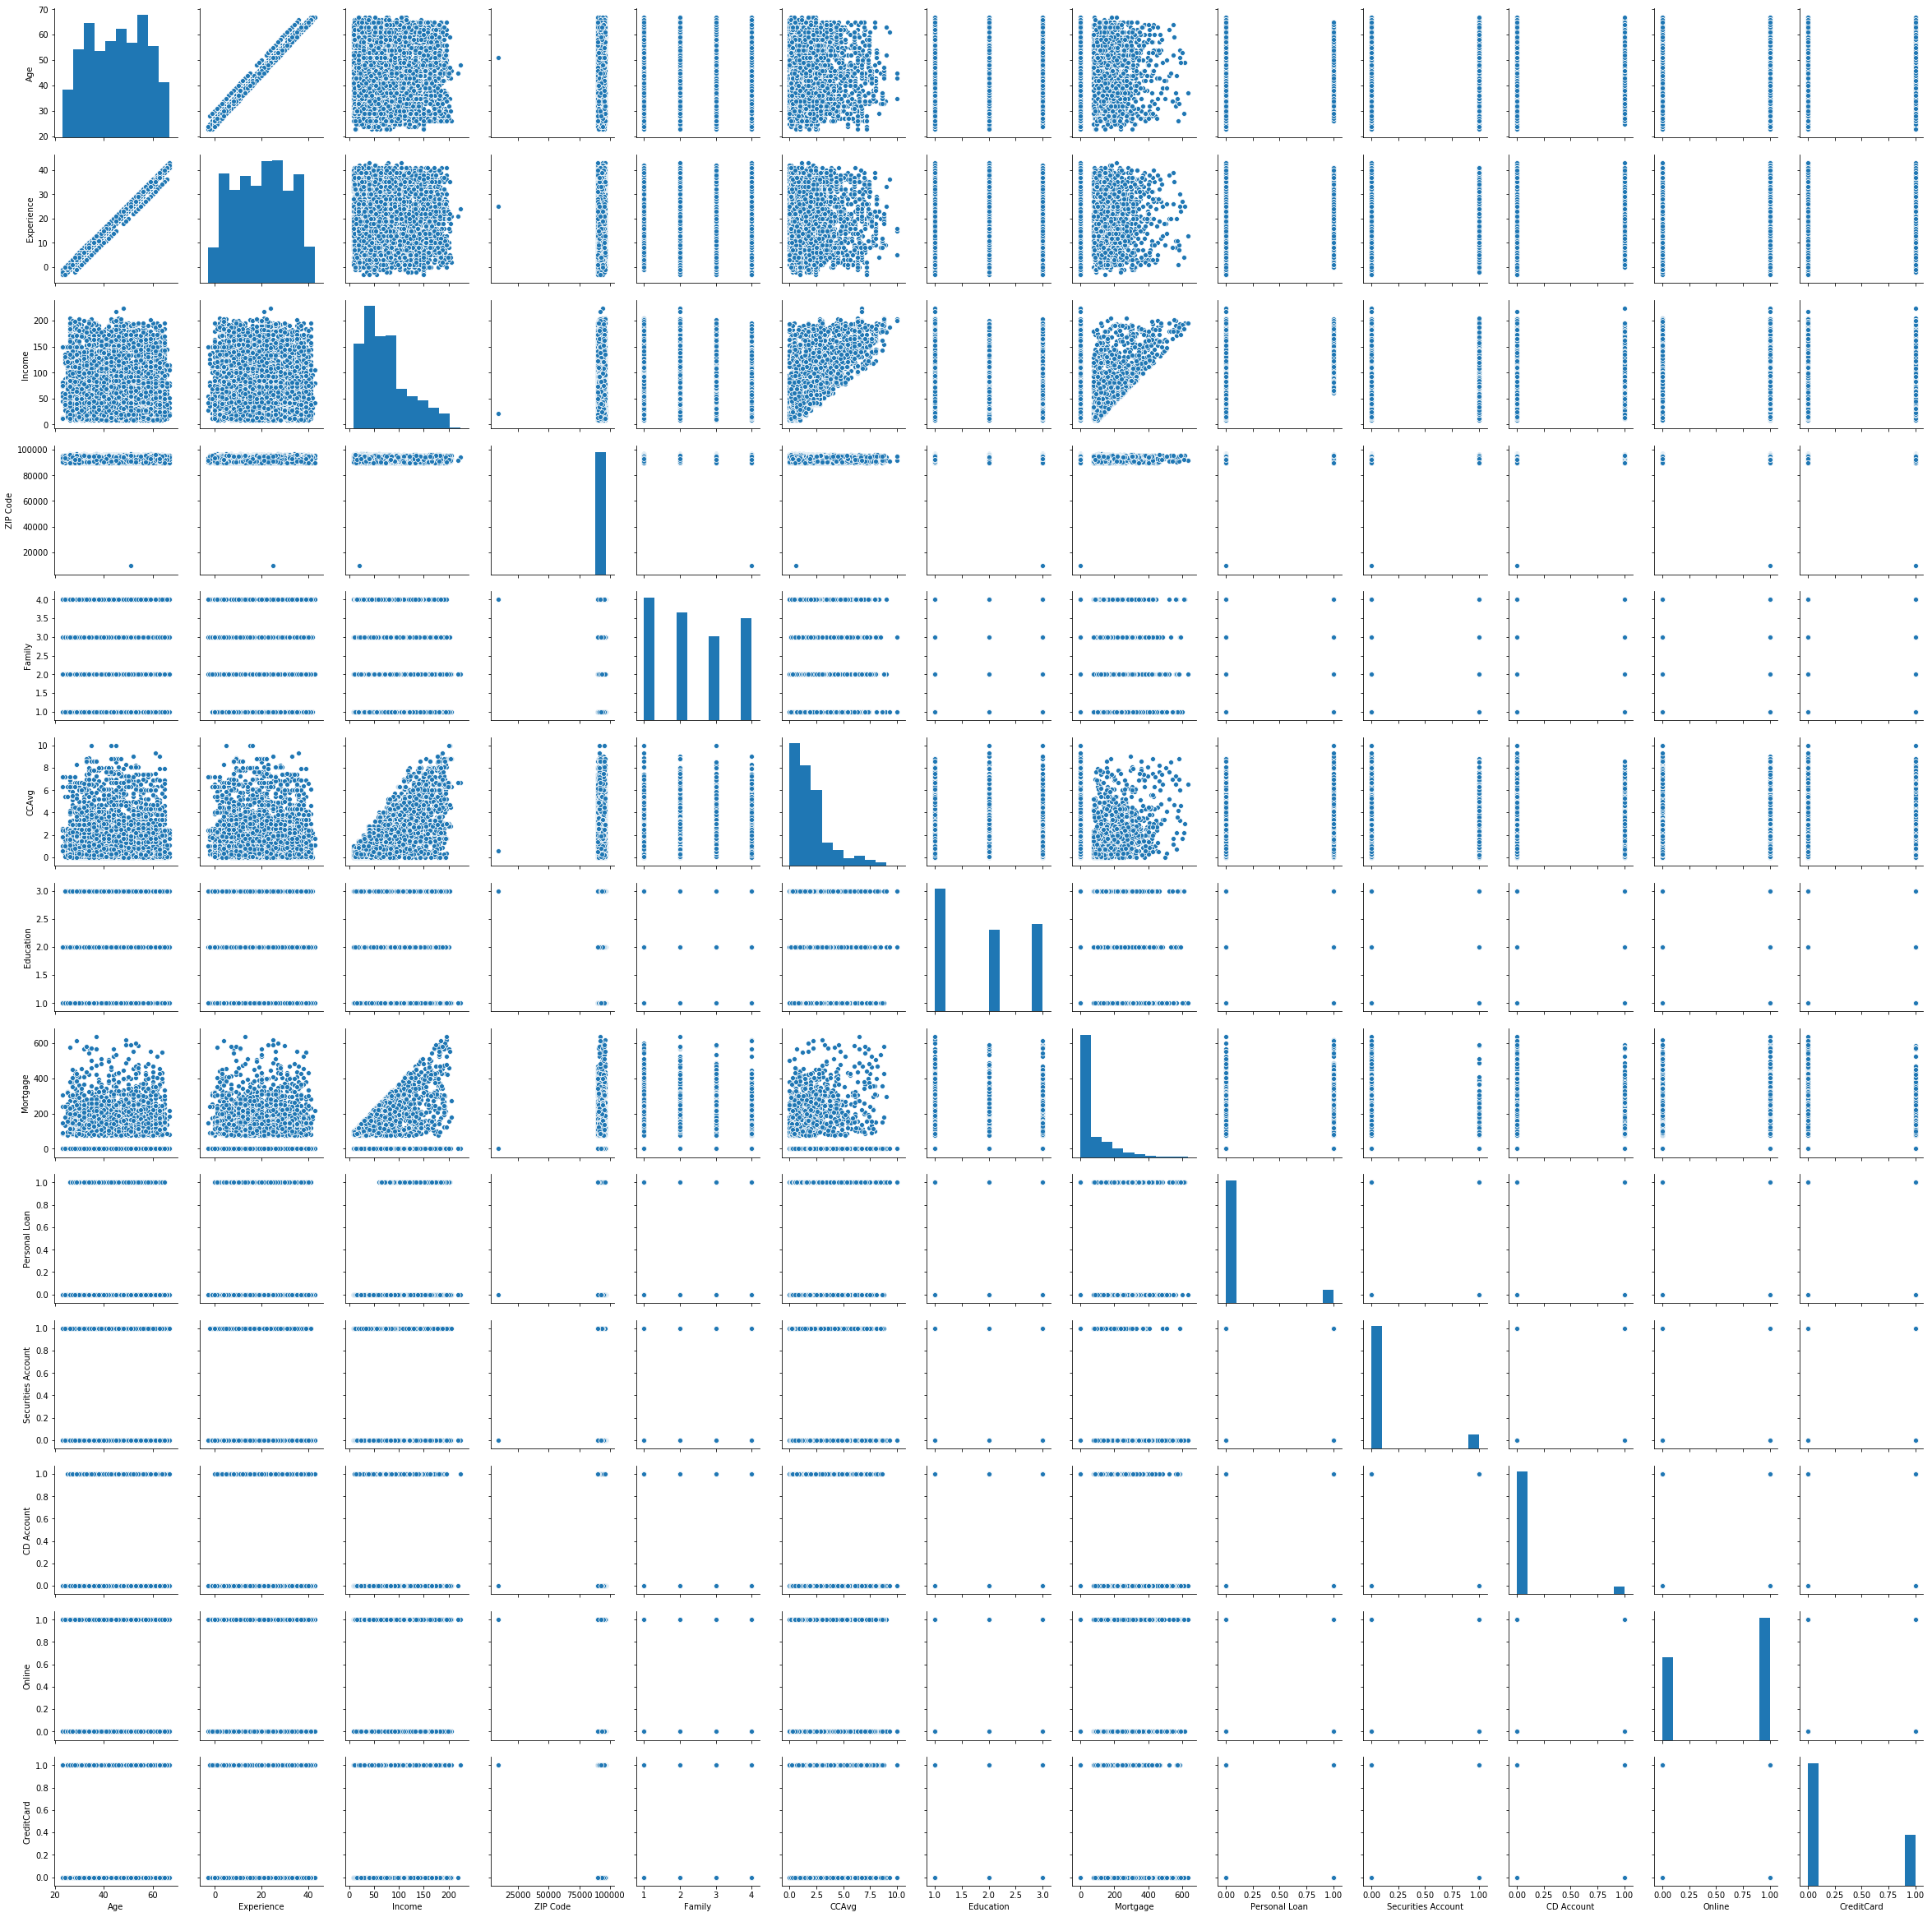

In [7]:
sns.pairplot(loan_df.iloc[:,1:])

In [8]:
loan_df[loan_df<0].count()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

There are negative values in experience field.

In [9]:
(loan_df.Experience<0).value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [10]:
pos_exp_df = loan_df[['ID','Age','Education','Experience']].loc[loan_df[(loan_df.Experience>0)==True].index].reset_index(drop=True)
neg_exp_list = loan_df['ID'].loc[loan_df[(loan_df.Experience<0)==True].index].tolist()

#age = loan_df["Age"].loc[loan_df['ID']==25].tolist()
#education = loan_df["Education"].loc[loan_df['ID']==25].tolist()

for id in neg_exp_list:
    age = loan_df["Age"].loc[loan_df['ID']==id].tolist()[0]
    education = loan_df["Education"].loc[loan_df['ID']==id].tolist()[0]
    exp_df = pos_exp_df[(pos_exp_df.Age==age)&(pos_exp_df.Education==education)]
    valid_exp = exp_df['Experience'].median()
    loan_df["Experience"].loc[loan_df['ID']==id]= valid_exp

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
(loan_df.Experience<0).value_counts()

False    5000
Name: Experience, dtype: int64

In [12]:
#but few null values are present after replacing with its median value
loan_df.isnull().sum()

ID                     0
Age                    0
Experience            29
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [13]:
#assuming their experience as 0 and replacing it with 0
loan_df['Experience'] = loan_df['Experience'].fillna(0)
loan_df['Experience'] = loan_df['Experience'].astype('int64')

In [14]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


EDA: Study the data distribution in each attribute and target variable, share your findings(20 marks)
1. Number of unique in each column?
2. Number of people with zero mortgage?
3. Number of people with zero credit card spending per month?
4. Value counts of all categorical columns.
5. Univariate and Bivariate
6. Get data model ready

In [15]:
#Number of unique in each column?
loan_df.nunique(axis=0)

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [16]:
#Number of people with zero mortgage?
(loan_df['Mortgage'] == 0).sum(axis=0)

3462

In [17]:
#Number of people with zero credit card spending per month?
without_cc = loan_df[(loan_df['CreditCard'] == 0)]['CCAvg'].sum()
with_cc = loan_df[(loan_df['CreditCard'] != 0)]['CCAvg'].sum()
print("Amount spent by customers with credit card issues by bank", with_cc)
print("Amount spent by customers without credit card", without_cc)
print("Seems like customers without card uses more credit card for purchase.")

Amount spent by customers with credit card issues by bank 2822.14
Amount spent by customers without credit card 6867.55
Seems like customers without card uses more credit card for purchase.


In [18]:
#4. Value counts of all categorical columns.
#convert the data type of categorical variable from int to category
loan_df1 = loan_df.copy()
loan_df1['Family'] = loan_df1['Family'].astype('category')
loan_df1['Education'] = loan_df1['Education'].astype('category')
loan_df1['Personal Loan'] = loan_df1['Personal Loan'].astype('category')
loan_df1['Securities Account'] = loan_df1['Securities Account'].astype('category')
loan_df1['CD Account'] = loan_df1['CD Account'].astype('category')
loan_df1['Online'] = loan_df1['Online'].astype('category')
loan_df1['CreditCard'] = loan_df1['CreditCard'].astype('category')

for i in list(loan_df1.columns[loan_df1.dtypes=='category']):
    print(loan_df1[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



From above data, we can see that more number of people doesnt have Personal Loan, Securities Account, CD Account and CreditCard.

In [19]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
(loan_df['Personal Loan'].value_counts()/5000)*100

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

only 9.6% of customers applied for personal loan previously

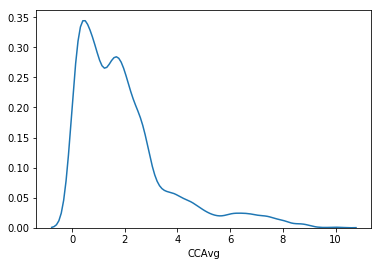

In [21]:
#5. Univariate 
#loan_df.columns
sns.distplot(loan_df['CCAvg'], hist=False)

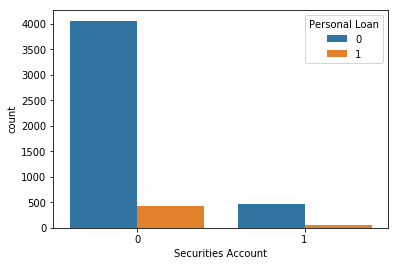

In [22]:
sns.countplot(x='Securities Account', data=loan_df, hue='Personal Loan')

Seems like customer who doesnt have loan has security accounts

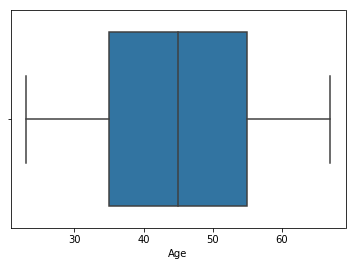

In [23]:
sns.boxplot(loan_df.Age)

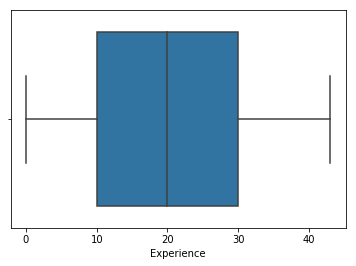

In [24]:
sns.boxplot(loan_df.Experience)

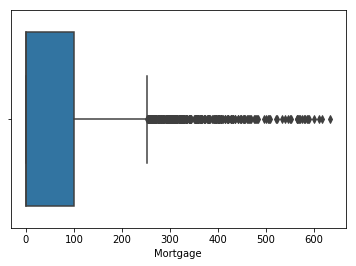

In [25]:
sns.boxplot(loan_df.Mortgage)

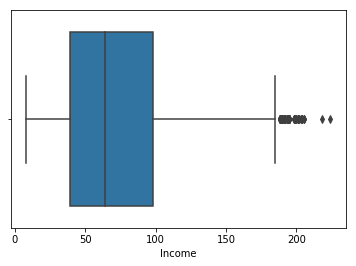

In [26]:
sns.boxplot(loan_df.Income)

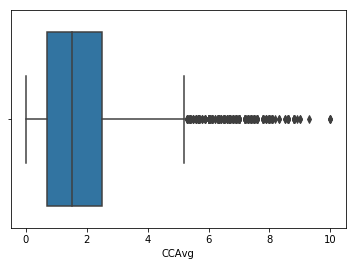

In [27]:
sns.boxplot(loan_df.CCAvg)

Seems like there are outliers in Mortgage, Income and CCAvg columns

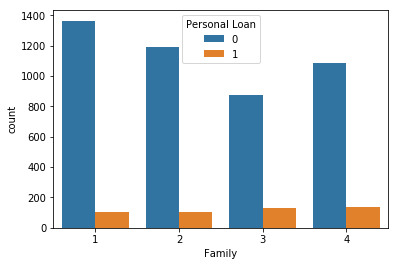

In [28]:
sns.countplot(x='Family', data=loan_df, hue='Personal Loan')

Family size of more than 3, take loan a little bit lot compared to other counts. But family doesnt have much impact on loan

In [29]:
loan_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

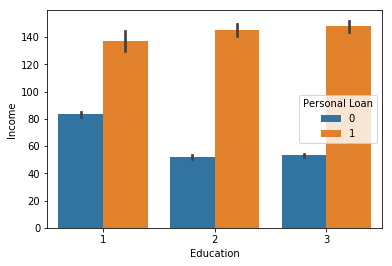

In [30]:
sns.barplot(x='Education',y='Income', data=loan_df,hue='Personal Loan')

Customers with 'Undergraduate' degree has more income, but they doesnt take more loan compare to other level educated people

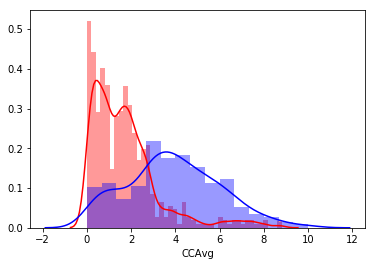

In [31]:
ccavg_0 = loan_df[loan_df['Personal Loan']==0]['CCAvg']
ccavg_1 = loan_df[loan_df['Personal Loan']==1]['CCAvg']
sns.distplot(ccavg_0, color='red')
sns.distplot(ccavg_1, color='blue')

Customers with no personal loan spends amount using credit card.

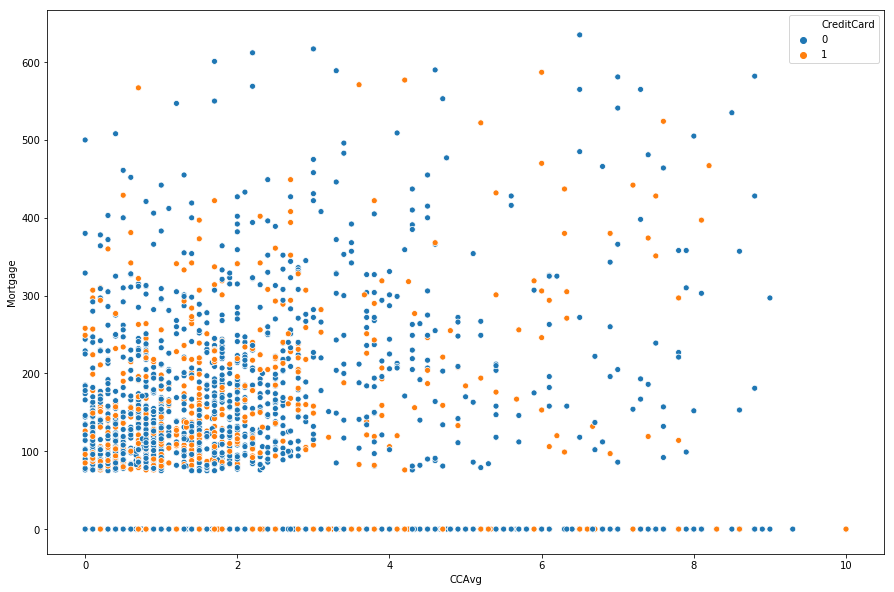

In [32]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='CCAvg',y='Mortgage',data=loan_df,hue='CreditCard', ax=ax)

In [33]:
#Dropping ID and ZIP Code column.
loan_df.drop(columns={'ID','ZIP Code'},inplace=True, axis=1)
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


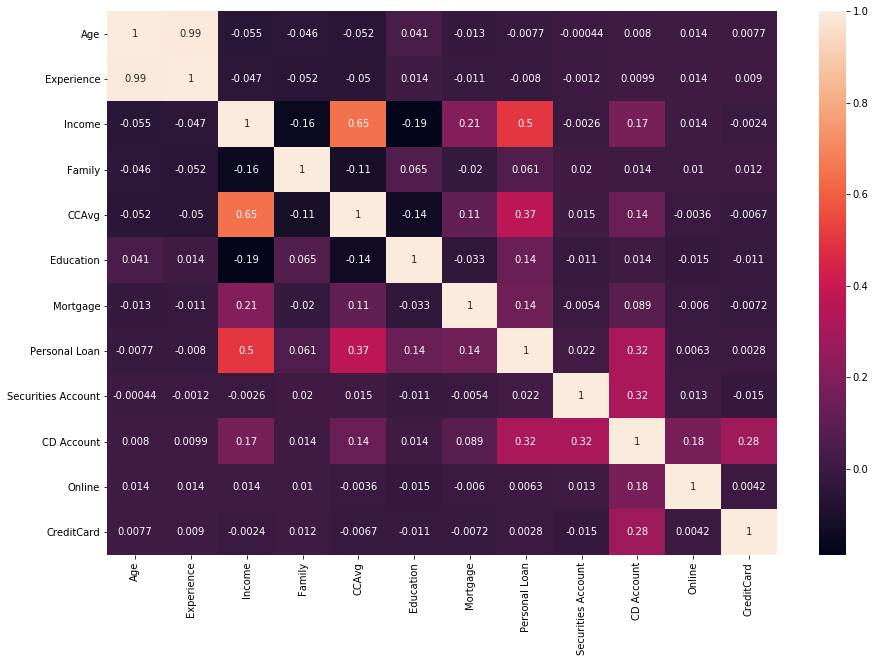

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(data = loan_df.corr(), annot=True)

In [35]:
#Convert X & Y variable to a categorical variable as relevant
loan_df['Education'] = loan_df['Education'].astype('category')
loan_df['Personal Loan'] = loan_df['Personal Loan'].astype('category')
loan_df = pd.get_dummies(loan_df,columns=['Education','Personal Loan'],drop_first = True)
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Personal Loan_1
0,25,1,49,4,1.6,0,1,0,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0,0


In [36]:
loan_df.rename(columns = {'Education_2':'Graduate','Education_3':'Advanced/Professional','Personal Loan_1':'Personal Loan'}, inplace = True)
loan_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Graduate,Advanced/Professional,Personal Loan
0,25,1,49,4,1.6,0,1,0,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0,0


Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [37]:
x = loan_df.drop(columns = {'Personal Loan'},axis=1)
y = loan_df['Personal Loan']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=50)

In [39]:
# checking the shape of train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 12)
(1500, 12)
(3500,)
(1500,)


4. Use Logistic Regression model to predict the likelihood of a customer buying personal loans.
Print all the metrics related for evaluating the model performance (15 marks)

In [57]:
from sklearn.linear_model import LogisticRegression
logireg = LogisticRegression(solver='liblinear', random_state = 101)
logireg.fit(x_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=101, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
#predicting values
y_pred = logireg.predict(x_test)

In [42]:
#calculating ooeff and intercept
print("Coefficient:", logireg.coef_)
print("Intercept:",logireg.intercept_)

Coefficient: [[-3.82375284e-01  3.85496794e-01  5.51871495e-02  4.88416472e-01
   1.08217236e-01  5.23330025e-04 -7.48695313e-01  3.33251973e+00
  -4.74984599e-01 -9.88220639e-01  3.37401136e+00  3.63759491e+00]]
Intercept: [-2.19603136]


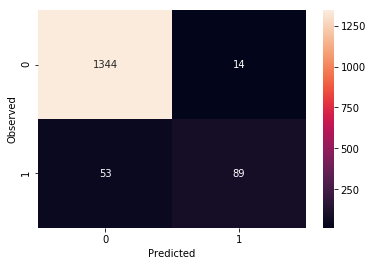

In [43]:
#Building confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='g')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [44]:
#Accuracy Score of confusion matrix
logistic_accuracy = round(accuracy_score(y_test,y_pred),2)
print("Accuracy for Logistic Regression Model : ", logistic_accuracy)

Accuracy for Logistic Regression Model :  0.96


In [45]:
print("Trainig accuracy",round(logireg.score(x_train,y_train),2))
print()
print("Testing accuracy",round(logireg.score(x_test, y_test),2))

Trainig accuracy 0.96

Testing accuracy 0.96


In [46]:
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

Recall: 0.6267605633802817

Precision: 0.8640776699029126

F1 Score: 0.726530612244898

Roc Auc Score: 0.8082256425148832


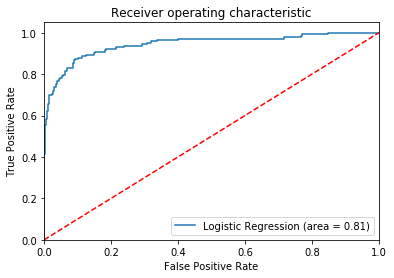

In [47]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logireg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logireg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameters

In [48]:
#getting the parameter values
logireg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
#validating based on penalty
model = LogisticRegression(random_state=10,penalty='l1')

model.fit(x_train, y_train)

y_predict = model.predict(x_test)     

print("Trainig accuracy",round(model.score(x_train,y_train),2))  
print()
print("Testing accuracy",round(model.score(x_test, y_test),2))
print()
#Accuracy Score of confusion matrix
logistic_accuracy = round(accuracy_score(y_test,y_predict),2)
print("Accuracy for Logistic Regression Model : ", logistic_accuracy)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trainig accuracy 0.96

Testing accuracy 0.96

Accuracy for Logistic Regression Model :  0.96


There is no much change in Accuracy after changing the values of penalty

In [50]:
#validating by changing the solver
train_score=[]                                 
test_score=[]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', solver = i)  
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))  
    
print(solver)
print()
print(train_score)
print()
print(test_score)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.958, 0.954, 0.958, 0.907, 0.907]

[0.959, 0.949, 0.955, 0.908, 0.906]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Values looks similar and high for all solvers except 'sag' and 'saga'

In [51]:
#validating by changing the class_weight
model = LogisticRegression(random_state=42,penalty='l1',class_weight='balanced')

model.fit(x_train, y_train)

y_predict = model.predict(x_test)     

print("Trainig accuracy",round(model.score(x_train,y_train),2))  
print()
print("Testing accuracy",round(model.score(x_test, y_test),2))
print()
#Accuracy Score of confusion matrix
logistic_accuracy = round(accuracy_score(y_test,y_predict),2)
print("Accuracy for Logistic Regression Model : ", logistic_accuracy)
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Trainig accuracy 0.91

Testing accuracy 0.91

Accuracy for Logistic Regression Model :  0.91
Recall: 0.6267605633802817

Precision: 0.8640776699029126

F1 Score: 0.726530612244898

Roc Auc Score: 0.8082256425148832


Accuracy is reducing after changing the values of penalty along with class weight

In [52]:
#By changing the C value for penalty l2
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=10,penalty='l2', C=i, solver='liblinear')  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.926, 0.946, 0.952, 0.956, 0.957, 0.958]

[0.921, 0.945, 0.952, 0.953, 0.955, 0.955]


Here Accuracy is incresing when C value increases. We can go with the default C value 1

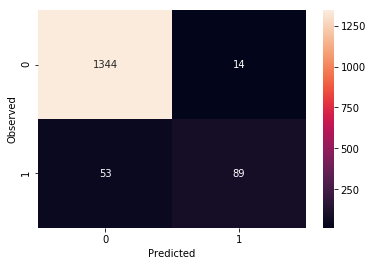

In [53]:
#Final model
#Building confusion matrix
logireg = LogisticRegression(random_state=10,penalty='l2', C=1, solver='liblinear') 
logireg.fit(x_train, y_train) 
y_predict = model.predict(x_test)  
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='g')
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [54]:
logistic_accuracy = round(accuracy_score(y_test,y_pred),2)
print("Accuracy for Logistic Regression Model : ", logistic_accuracy)
print()
print("Trainig accuracy",round(logireg.score(x_train,y_train),2))
print()
print("Testing accuracy",round(logireg.score(x_test, y_test),2))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

Accuracy for Logistic Regression Model :  0.96

Trainig accuracy 0.96

Testing accuracy 0.96

Recall: 0.6267605633802817

Precision: 0.8640776699029126

F1 Score: 0.726530612244898

Roc Auc Score: 0.8082256425148832


In [55]:
#!pip install yellowbrick

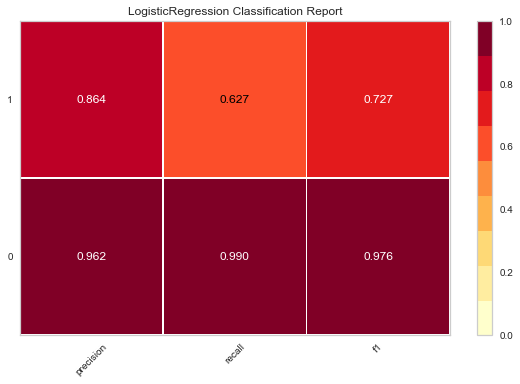

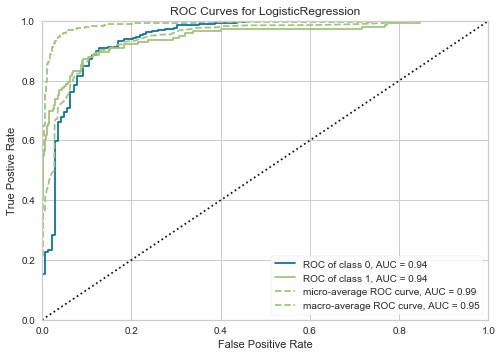

In [56]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logireg)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(logireg)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

As per confusion matrix,

1. True Positives (TP): Correctly predicted 1344 customers will buy a loan

2. True Negatives (TN): Correctly predicted 89 customers will not buy a loan.

3. False Positives (FP): Incorrectly predicted 53 customers will buy a loan, but they will not: Type I error

4. False Negatives (FN): Incorrectly predicted 14 customers will not buy a loan, they will: Type II error
        
Here 
1. TP, TN cases customers are handled as predicted. so there will be no loss for bank. 
2. FP: Incorreclty predicted that customers will take loan. but they will not. Here bank will not lose their amount.
3. FN: Incorrectly predicted customers will not take loan, but they will. In this case there will be loss for bank.  Recall is important in this case.